In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [185]:
df_cleaned = pd.read_csv(r"/content/Cleaned Smart-Watches data.csv")

In [186]:
df_cleaned.head()

,Brand,Model,Operating System,Bluetooth,Wi-Fi,Cellular,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (INR)
0,Apple,Watch Series 7,Watch OS,1,1,1,Retina,1.90,396 x 484,50.0,18.0,1,1,1,33117
1,Samsung,Galaxy Watch 4,Wear OS,1,1,1,AMOLED,1.40,450 x 450,50.0,40.0,1,1,1,20667
2,Garmin,Venu 2,Garmin OS,1,1,0,AMOLED,1.30,416 x 416,50.0,11.0,1,1,0,33117
3,Fitbit,Versa 3,Fitbit OS,1,1,0,AMOLED,1.58,336 x 336,50.0,6.0,1,1,1,19007
4,Fossil,Gen 6,Wear OS,1,1,0,AMOLED,1.28,416 x 416,30.0,24.0,1,1,1,24817


### APPLYING FINAL ONE-HOT ENCODING TO CLEANED DATASET TO CONVERT THE REMAINING CATEGORICAL DATA TO NOMINAL DATASET

In [187]:
df_encod = df_cleaned.copy()

object_features = df_encod.select_dtypes(include = "object").columns.tolist()
print(len(object_features))
print(object_features)

5
['Brand', 'Model', 'Operating System', 'Display Type', 'Resolution']


In [188]:
print("Shape of df before encoding: ", df_encod.shape)

df_encod = pd.get_dummies(df_encod,
               columns=object_features,
               prefix = object_features,
               drop_first = True).astype(int)

print("Shape of df after encoding: ", df_encod.shape)

Shape of df before encoding:  (366, 15)
Shape of df after encoding:  (366, 256)


In [189]:
df = df_encod.copy()

## Splitting the dataset into X and Y for training and testing

In [190]:
X = df.drop(columns = "Price (INR)")
y = df["Price (INR)"]

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Feature Scaling

In [192]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Training Multiple Models - Pre-requisites

In [193]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [194]:
# Function to get metrics
def get_metrics(y_test, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    print(f"{model_name} : ['MSE': {round(MSE, 3)}, 'RMSE': {round(RMSE, 3)}, 'MAE': {round(MAE, 3)}, 'R2': {round(R2, 3)}]")

## Training Multiple Models

In [195]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [196]:
# Training Ridge and Lasso Regression
rir = Ridge().fit(X_train, y_train)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train, y_train)
y_pred_lar = lar.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.368e+07, tolerance: 8.206e+06
  model = cd_fast.enet_coordinate_descent(


### Scores after models are trained

In [197]:
# Get metrics for each model

get_metrics(y_test, y_pred_rir, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")

Ridge : ['MSE': 35918662.319, 'RMSE': 5993.218, 'MAE': 3460.099, 'R2': 0.822]
Lasso : ['MSE': 40554258.593, 'RMSE': 6368.223, 'MAE': 3459.126, 'R2': 0.799]


In [198]:
# # Polynomial Regression
# poly = PolynomialFeatures(2)
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

# poly_r = LinearRegression().fit(X_train_poly, y_train)
# y_pred_poly = poly_r.predict(X_test_poly)

In [199]:
# get_metrics(y_test, y_pred_poly, "PolynomialFeatures")

In [200]:
# Support Vector Regression
svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [201]:
get_metrics(y_test, y_pred_svr, "SVR")

SVR : ['MSE': 211183994.485, 'RMSE': 14532.171, 'MAE': 9074.33, 'R2': -0.048]


In [202]:
# KNeighbors Regressor
knnr = KNeighborsRegressor().fit(X_train, y_train)
y_pred_knnr = knnr.predict(X_test)

In [203]:
get_metrics(y_test, y_pred_knnr, "KNeighborsRegressor")

KNeighborsRegressor : ['MSE': 63254403.279, 'RMSE': 7953.264, 'MAE': 5081.843, 'R2': 0.686]


In [204]:
# Decision Tree Regressor
dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

In [205]:
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")

DecisionTreeRegressor : ['MSE': 45203958.456, 'RMSE': 6723.389, 'MAE': 3464.143, 'R2': 0.776]


In [206]:
# Random Forest Regressor
rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

In [207]:
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")

RandomForestRegressor : ['MSE': 32254531.86, 'RMSE': 5679.307, 'MAE': 3122.43, 'R2': 0.84]


In [208]:
# XGBoost Regressor
xgbr = XGBRegressor().fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

In [209]:
get_metrics(y_test, y_pred_xgbr, "XGBRegressor")

XGBRegressor : ['MSE': 35836625.849, 'RMSE': 5986.37, 'MAE': 3127.027, 'R2': 0.822]


In [210]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor().fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
get_metrics(y_test, y_pred_gbr, "GradientBoostingRegressor")

GradientBoostingRegressor : ['MSE': 38001596.374, 'RMSE': 6164.543, 'MAE': 4075.595, 'R2': 0.811]


In [211]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor().fit(X_train, y_train)
y_pred_abr = abr.predict(X_test)
get_metrics(y_test, y_pred_abr, "AdaBoostRegressor")

AdaBoostRegressor : ['MSE': 75648903.839, 'RMSE': 8697.638, 'MAE': 6449.457, 'R2': 0.625]


In [212]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor().fit(X_train, y_train)
y_pred_etr = etr.predict(X_test)
get_metrics(y_test, y_pred_etr, "ExtraTreesRegressor")

ExtraTreesRegressor : ['MSE': 42031828.743, 'RMSE': 6483.196, 'MAE': 3111.344, 'R2': 0.791]


In [213]:
# LightGBM Regressor
from lightgbm import LGBMRegressor
lgbmr = LGBMRegressor().fit(X_train, y_train)
y_pred_lgbmr = lgbmr.predict(X_test)
get_metrics(y_test, y_pred_lgbmr, "LGBMRegressor")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 292, number of used features: 15
[LightGBM] [Info] Start training from score 25413.349315
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [214]:
# CatBoost Regressor
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(verbose=0).fit(X_train, y_train)
y_pred_cbr = cbr.predict(X_test)
get_metrics(y_test, y_pred_cbr, "CatBoostRegressor")

CatBoostRegressor : ['MSE': 29346028.161, 'RMSE': 5417.197, 'MAE': 3250.393, 'R2': 0.854]


In [215]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet
en = ElasticNet().fit(X_train, y_train)
y_pred_en = en.predict(X_test)
get_metrics(y_test, y_pred_en, "ElasticNet")

ElasticNet : ['MSE': 18886115.169, 'RMSE': 4345.816, 'MAE': 3222.213, 'R2': 0.906]


In [216]:
# Huber Regressor
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor().fit(X_train, y_train)
y_pred_hr = hr.predict(X_test)
get_metrics(y_test, y_pred_hr, "HuberRegressor")

HuberRegressor : ['MSE': 33921689.106, 'RMSE': 5824.233, 'MAE': 3089.383, 'R2': 0.832]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Best Model for this case: ElasticNet with 'R2': 0.906

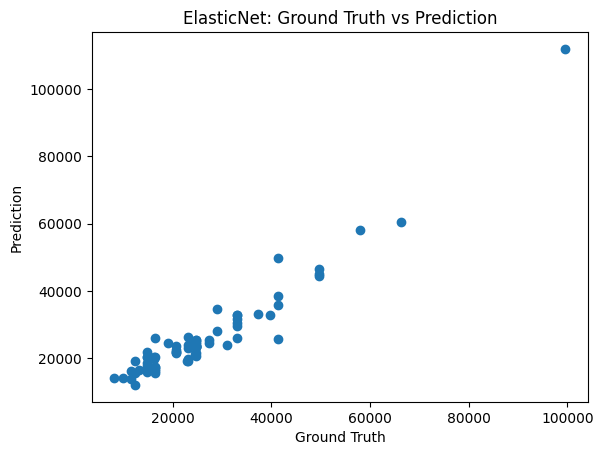

In [220]:
plt.scatter(y_test, y_pred_en)
plt.title("ElasticNet: Ground Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

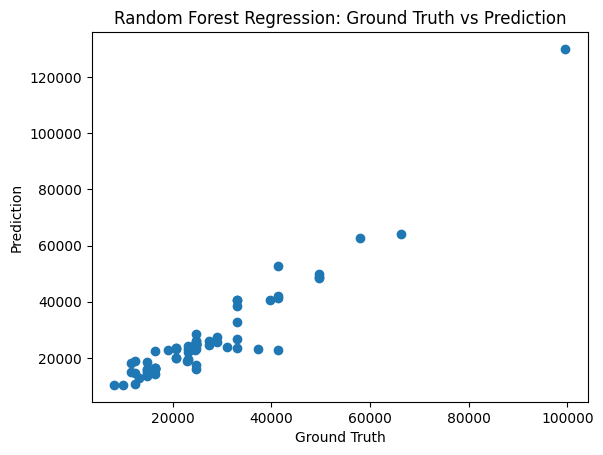

In [218]:
plt.scatter(y_test, y_pred_rfr)
plt.title("Random Forest Regression: Ground Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

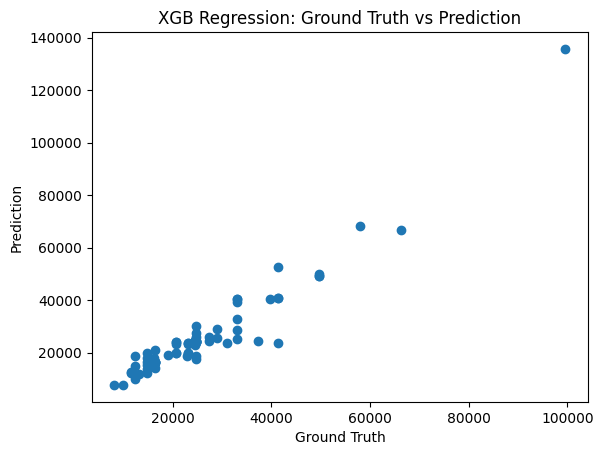

In [219]:
plt.scatter(y_test, y_pred_xgbr)
plt.title("XGB Regression: Ground Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()